# Day 3 - Lectures on Structural Econometrics for Dynamic Discrete Choice Models 


# 1 - Model

We now investigate how conditional choice probability methods can be extended to the estimation of dynamic games. We focus on an entry and exit game, a canonical example within the IO literature that has been used frequently in applied work.

The basic structure of the game is as follows:
- Time $t$ is discrete, with $t = 1,2,\dots,\infty$.
- There are $I$ firms in each market $m$, with $N_m$ markets total.
- The environment is stationary (choice probabilities, state transitions, and flow utilities only depend on time through the realization of the state variable in that period).
- Each period, firms (simultaneously) make decisions about whether to enter the market (if they are currently out of the market) or permanently exit the market (if they are currently an incumbent). A firm that exits that market is replaced next period by a potential entrant.
- Firms have private information about their payoffs through an identically and independtly distributed random variable $\epsilon_{jt}^{(i)}$ for each period $t$, firm $i$, and choice $j$.

The primary difference between the single-agent framework and the multi-agent framework is that both agents' flow utilities and the evolution of state variables is determined by the realizations of the actions of all players. To account for this, our notation will adjust following Arcidiacono and Miller (2011) to "big" and "little" notation: "big" notation (capital letters) denotes flow utilities $U^{(i)}$, choice probabilities $P$, and state transitions $F_j$ for firm  conditional on the realizations for opponents' actions . Because these terms condition on the outcomes of decisions that firm  will not know when they make their own choice, due to the simultaneity of decisions, we need to integrate over the distributions of the vector of choices in order to obtain the "little" notation that we have used in previous notes.

Utility for firm $i$ to enter/remain in the market is given by:

$$U^{(i)}_2(x_t^{(i)}, s_t^{(i)},d_t^{(-i)}) = \theta_0 + \theta_1 x_1 + \theta_2 s_t + \theta_3 (1-d_{2,t-1}^{(i)}) + \theta_4 \sum_{i'\neq i} d_{2t}^{(i')}$$

Where $x_1$ is a permanent market characteristic affecting all firms, $s_t$ is a transitory market characteristic affecting all firms, $\sum_{i'  \neq i} d_{2t}^{(i')}$ is the sum of $i$'s (potential) competitors that are active in the market in period , and $\theta_4$ captures the entry cost that firm  incurs if it was not active in the previous period.

- Define $z_t$ to be the set of state variables. Consistent with our previous notation, let $p^{(i)}_{j}(z_t)$ be the probability that firm $i$ chooses choice $j$ conditional on state $z_t$.
- The "big P" probability of observing a set of choices $d_t^{(-i)}$ from $i$'s competitors in period $t$ conditional on state $z_t$ is

$$P(d_t^{(-i)} | z_t) = \prod_{i'\neq i} \Big( \sum_{j=1}^J d_{jt}^{(i')} p_j^{(i')}(z_t) \Big)$$

- Then we can express the expected flow payoff for firm $i$ from choosing $j$ in state $z_t$, net of the choice-specific private payoff term $\epsilon_{jt}^{(i)}$, as:

$$ u_j^{(i)}(z_t) = \sum_{d_t^{(-i)} \in J^{I-1}} P(d_t^{(-i)} | z_t) U_j^{(i)} (z_t, d_t^{(-i)})$$

- Similarly, the distribution over next period's state variables when firm $i$ makes choice $j$, $f_j^{(i)}(z_{t+1} | z_t)$ , can be expressed as:

$$ f_j^{(i)}(z_{t+1} | z_t) = \sum_{d_t^{(-i)} \in J^{I-1}} P(d_t^{(-i)} | z_t)  F_j(z_{t+1} | z_t, d_t^{(-i)})$$

- These terms can be used to express the conditional value function $v_j^{(i)}(z_t)$ in a familiar form as:

$$ v_j^{(i)}(z_t) = u_j^{(i)}(z_t) + \beta \sum_{z_{t+1}=1}^Z \Big[ v_k^{(i)}(z_{t+1}) + \psi_k[p^{(i)}(z_{t+1})] \Big]f_j^{(i)}(z_{t+1} | z_t)$$

- Assuming that $\epsilon_{jt}^{(i)}$ are i.i.d. Type I Extreme Value and exploiting the terminal decision of exiting the market allows us to express the conditional value function using the one-period ahead conditional choice probabilities:

$$ v_2^{(i)}(x_t,s_t) = u_2^{(i)}(x_t,s_t) - \beta \sum_{x_{t+1} \in X} \sum_{s_{t+1} \in S} [\log(p_1^{(i)}(x_{t+1},s_{t+1}) ] f_2^{(i)}(x_{t+1},s_{t+1} | x_t, s_t) + \beta*\gamma$$

# 2 - Empirical setting
We assume that we have 3000 markets, each with up to 5 firms, and that we observe the market for 10 periods. We assume that $X = \{0,1,2,\dots,9\}$ (10 state values for the permanent market-wide state), and that $S = \{0,1,2,3,4\}$ (five state values for the transitory market-wide state). Finally, we set the discount factor $\beta$ to be 0.9. Summarizing the data conditions used in the empirical setting, we have:

$$ N_m = 3000, \quad N_f = 5, \quad N_x = 10, N_s = 5, T=10$$


In [113]:
using LinearAlgebra, Plots, DataFrames, SpecialFunctions, Random, GLM, Optim

# Set data parameters

Nm=3000;
Nf=5;
T=10;
Tl=10;
S=5;
Xn=10;
β=.9;

The parameters $\mathbf{\theta}$ = 

$$ \left( \begin{array}{c} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4 \end{array} \right)= \left( \begin{array}{c} 0 \\ -0.05 \\ 0.25 \\ -1.5 \\ -0.2    \end{array} \right), \qquad \beta=0.9 $$

In [114]:
#Structural entry coefficients theta:

bx0=0;
bx=-.05;
bss=.25;
bnf=-.2;
be=-1.5;

θ = [bx0,bx,bss,bnf,be];

# Price coefficients -- not important until there are unobserved states
bp=[7; -.4 ;-.1 ;.3];

Finally, we assume that the transition over the time-varying market-specific state  is governed by the following transition matrix:


$$F_s = \left( \begin{array}{c c c c c} 0.700 & 0.075 & 0.075 & 0.075 & 0.075 \\ 0.075 &0.700 & 0.075 & 0.075 & 0.075 \\ 0.075 & 0.075 &0.700 & 0.075 & 0.075 \\ 0.075 & 0.075 & 0.075&0.700  & 0.075 \\0.075 & 0.075 & 0.075  & 0.075 &0.700 \end{array} \right)$$

In [115]:
# Parameters governing transition of s
ps=.7;
nps=(1-ps)/(S-1);
trans=ps*I(S)+nps*(1 .-I(S));

ctrans = cumsum(trans[:,1:4],dims=2);

nf=(0:Nf)';


We will create a matrix that contains all possible states by taking all combinations of the numbers of firms, permanent characteristic , time-varying characteristic , and the firm's previous incumbency status.

The columns of $A$ are:
- 1: Number of incumbent firms
- 2: Value of $X_m$
- 3: Value of $S_{mt}$
- 4: Indicator that firm is potential entrant (not incumbent).

In [116]:
# Generate firm-level utility for all state combinations

state_args=(0:Nf,0:Xn-1,0:S-1,0:1);

A = Matrix(DataFrame(Iterators.product(state_args[1],state_args[2],state_args[3],state_args[4])));
A #Printing A to understand the structure

600×4 Matrix{Int64}:
 0  0  0  0
 1  0  0  0
 2  0  0  0
 3  0  0  0
 4  0  0  0
 5  0  0  0
 0  1  0  0
 1  1  0  0
 2  1  0  0
 3  1  0  0
 ⋮        
 3  8  4  1
 4  8  4  1
 5  8  4  1
 0  9  4  1
 1  9  4  1
 2  9  4  1
 3  9  4  1
 4  9  4  1
 5  9  4  1

Our last "pre-data" step is to define binomial coefficients that combine individual firms' choice probabilities into the transition probability over the total number of firms in the market. We will track entrants and incumbents separately, as they will have different conditional choice probabilities due to the sunk entry cost.

In [117]:
# Fill binomial

binom = [binomial(n-1,k-1)*(n>=k) for n in 1:Nf+1, k in 1:Nf+1]

#binom=zeros(Nf+1,Nf+1);
#for n in 1:Nf+1   
#    for k in 1:n       
#        binom[n,k]=binomial(n-1,k-1);                  
#    end        
#end

6×6 Matrix{Int64}:
 1  0   0   0  0  0
 1  1   0   0  0  0
 1  2   1   0  0  0
 1  3   3   1  0  0
 1  4   6   4  1  0
 1  5  10  10  5  1

In the *binem* matrix, consider that each row corresponds to a number of potential entrants: $0, 1, 2,\dots, 5$. The value in $M_{nk} for $n\geq k$  represents the number of ways to have $k$ firms enter the market from  potential entrants. For example, $M_{4,3}$ is the number of ways for 3 firms to have two entrants, which is three (combinations are firms 1&2,  firms 2&3, and firms 1&3).

# 3 - Generating the data

Below there are two functions used to find the fixed point.

*nfirms* calculates the probability distribution for the number of firms in the market conditional on $p(z)$.

*prob_entry* finds the fixed point for the probability $p(z)$.

In [118]:
# Functions to find the fixed point.

function nfirms(pe1,pi1,bine,bini,ne,N)

    Pe = [bine[j]*(pe1^(j-1))*((1-pe1)^(ne-(j-1))) for j in 1:ne+1]
    Pi = [bini[j]*(pi1^(j-1))*((1-pi1)^(N-ne-(j-1))) for j in 1:N-ne+1]
    
    BigP=zeros(1,N+1);
    j=0;
    
    while j<ne+1
        k=0;
        while k<N-ne+1
            BigP[j+k+1]=Pe[j+1]*Pi[k+1]+BigP[j+k+1];
            k=k+1;
        end
        j=j+1;
    end
    return BigP;
end

function prob_entry(Util,trans,N,Xn,S,binom,β,A)
    BigP=zeros(size(A,1),N+1);
    fv=zeros(size(A,1),1);
    eul=Base.MathConstants.eulergamma;
    
    p=exp.(Util)./(1 .+ exp.(Util));
    
    p0=zeros((N+1)*Xn*S*2,1);
    p2=p;

    while maximum(abs.(p0-p2))>.0000000001
        p0=copy(p2);

        for j in 1:size(A,1)
            rowFirmEnter = Matrix([minimum([A[j,1]+A[j,4],N]) A[j,2] A[j,3] 0]);
            ind1 = only(indexin(eachrow(rowFirmEnter),eachrow(A)));
            rowFirmExit = Matrix([maximum([A[j,1]+A[j,4]-1,0]) A[j,2] A[j,3] 1]);
            ind2 = only(indexin(eachrow(rowFirmExit),eachrow(A)));
            BigP[j,:]=nfirms(p[ind1],p[ind2],binom[N-A[j,1]+1,:],binom[A[j,1]+1,:],N-A[j,1],N);
    
            v=0;
            for s2=1:S
                toLookIntoP = hcat(collect(0:5),repeat([A[j,2] s2-1 1],outer = [6,1]));
                elementsP = indexin(eachrow(toLookIntoP),eachrow(A));
                v=v + trans[A[j,3]+1,s2]*(BigP[j,:]'*log.(1 .- p[elementsP]));
            end
            fv[j]=-v;
        
            toLookIntoUtil = hcat(collect(0:5),repeat([A[j,2] A[j,3] A[j,4]],outer = [6,1]));
            elementsUtil = indexin(eachrow(toLookIntoUtil),eachrow(A));
            tu=BigP[j,:]'*Util[elementsUtil]-β*v+β*eul;
            p[j]=exp(tu)/(1+exp(tu));
    
        end
        p2=p;
    end
    fv=β.*(fv .+ eul);
    return p,BigP,fv;
end

prob_entry (generic function with 1 method)

*Util* collects the deterministic part of the utility flow of entering the market $U_2(z)$

In [119]:
Util=zeros(size(A,1),1);
for j in 1:size(A,1)
    Util[j]=0+bx*A[j,2]+bnf*A[j,1]+bss*A[j,3]+be*(1-A[j,4]);
end

N=Nf;

prob_out,_,_ = prob_entry(Util,trans,Nf,Xn,S,binom,β,A);


In [120]:
# Generating the data

function EntryDataGen(p,ctrans,S,Xn,Nf,Nm,T,Tl,A)
    Firm=zeros(Nm,T+Tl,Nf);
    Lfirm=zeros(Nm,T+Tl+1,Nf);
    X = rand(0:Xn-1,Nm);
    State=zeros(Nm,T+Tl+1);
    
    State[:,1]=rand(1:S,Nm);
    
    Draw1=rand(Nm,T+Tl,Nf); # Governs whether firm enters or not
    Draw2=rand(Nm,T+Tl); # Governs s state transition
    
    for nm in 1:Nm
        Nfirm=0;
        for t in 1:T+Tl
            for nf in 1:Nf
                rowOfA = [Nfirm-Lfirm[nm,t,nf],X[nm],State[nm,t]-1,Lfirm[nm,t,nf]];
                ind = [findfirst(row -> row == rowOfA, eachrow(A))];
                Firm[nm,t,nf]=p[only(ind)]>Draw1[nm,t,nf];
            end
    
            Nfirm=sum(Firm[nm,t,:]);
            Lfirm[nm,t+1,:]=Firm[nm,t,:];
    
            State[nm,t+1]=1;
    
            for s=1:S-1
                State[nm,t+1]=State[nm,t+1]+(Draw2[nm,t]>ctrans[Int(State[nm,t]),s]);
            end
        end
    end
    
    Firm=Firm[:,Tl+1:T+Tl,:];
    State=State[:,Tl+1:T+Tl] .- 1;
    Lfirm=Lfirm[:,Tl+1:T+Tl,:];

    return Firm, X, State, Lfirm
end

# Using the equilibrium choice probabilities, simulate the data on firm
# choices and states.
Random.seed!(2023);
Firm,X,State,Lfirm =EntryDataGen(prob_out,ctrans,S,Xn,Nf+1,Nm,T,Tl,A);

In [121]:
A

600×4 Matrix{Int64}:
 0  0  0  0
 1  0  0  0
 2  0  0  0
 3  0  0  0
 4  0  0  0
 5  0  0  0
 0  1  0  0
 1  1  0  0
 2  1  0  0
 3  1  0  0
 ⋮        
 3  8  4  1
 4  8  4  1
 5  8  4  1
 0  9  4  1
 1  9  4  1
 2  9  4  1
 3  9  4  1
 4  9  4  1
 5  9  4  1

# 5 - First stage estimation of the CCPs

Our data is in the form $N_m \times T \times (N_f - 1)$, i.e., a 3-D array that indexes over markets, time periods , and numbers of firms. While it is possible to work with the data directly in this structure, often it is simpler to use linear indexing to get column vectors for all the relevant variables. The code below creates a $(N_m * T * (N_f - 1)) \times 1$ vector for $X$, $S$, the number of firms, and the incumbency status for each firm.

In [122]:
# Reshape the data

S_vec = repeat(vec(State),Nf + 1); 
X_vec = repeat(vec(X),(Nf + 1)*Xn);

# Add firm-level decisions to get number of active firms in the previous period:
NFirm=dropdims(sum(Firm,dims = 3), dims= 3);
LNFirm=dropdims(sum(Lfirm,dims = 3), dims = 3);

NFirm_vec = repeat(vec(NFirm),Nf + 1); 
LNFirm_vec = repeat(vec(LNFirm),Nf + 1); 

Firm_vec=vec(Firm);
LFirm_vec=vec(Lfirm);

LNFirm_vec=LNFirm_vec-LFirm_vec;

Z = hcat(ones((Nf+1)*Nm*T,1), X_vec, S_vec, 1 .- LFirm_vec,LNFirm_vec);

To estimate the CCPs, we use a flexible logit specification with interactions between the state variables. Let $NF^{(-i)}_{mt-1}=\sum_{i'\neq i} d_{2t-1}^{(i')}$ denote the number of non-$i$  active firms in market $m$ during period $t-1$. To estimate the conditional choice probabilities, we use the following specification:

$$p_{2mt}^{(i)}(z_{mt}) = \frac{\exp(W_{imt}^{ccp}\lambda)}{1+\exp(W_{imt}^{ccp}\lambda)}, \quad W_{imt}^{ccp} = \Big[1, \ x_m, \ x_m^2, \ d_{2mt-1}^{(i)}, \ NF_{mt-1}^{(-i)}, \ \frac{(NF_{mt-1}^{(-i)})^2}{5}, \ s_{mt}, \ \frac{s_{mt}x_m}{10}, \ d_{2mt-1}^{(i)} s_{mt}, \ \frac{NF^{(-i)}_{mt-1}s_{mt} }{10}\Big]$$


In [123]:
# Create variables used in logit for reduced-form CCP estimation:
W_ccp = [ones(size(X_vec)) X_vec (X_vec./10).^2  LFirm_vec LNFirm_vec (LNFirm_vec./5).^2 S_vec S_vec.*X_vec./10 LFirm_vec.*S_vec LNFirm_vec.*S_vec./10];
model1 =  glm(W_ccp, Firm_vec, Binomial(), LogitLink());
lambda_hat =  model1.pp.beta0;

# Fit CCPs to each observations:
B = DataFrame(A,["LNFirms","X","S","LFirm"]);

B_fit = [ones(size(B,1),1) B.X (B.X./10).^2 B.LFirm B.LNFirms (B.LNFirms./5).^2 B.S B.S.*B.X./10 B.LFirm.*B.S B.S.*B.LNFirms./10];
ccp_hat=predict(model1,B_fit);

# 6 - Second-stage estimation of structural parameters

As with our previous examples using one-period finite dependence, estimating the structural parameters will be based on a likelihood constructed from the conditional value function expressed using the one-period ahead CCPs:

$$v_2^{(i)}(x_t,s_t) = u_2^{(i)}(x_t,s_t) - \beta \sum_{x_{t+1} \in X} \sum_{s_{t+1} \in S} [\log(p_1^{(i)}(x_{t+1},s_{t+1}) ] f_2^{(i)}(x_{t+1},s_{t+1} | x_t, s_t) + \beta \gamma$$

Three steps will generate all of the needed pieces to estimate  using a logit estimator:

- Using the estimates for the conditional choice probabilities $\hat{p}_2(z)$, estimate "big P": 
$$P(d_t^{(-i)} | z_t) = \prod_{i'\neq i} \Big( \sum_{j=1}^J d_{jt}^{(i')} p_j^{(i')}(z_t) \Big)$$
- Use $P(d_t^{(-i)} | z_t)$ to estimate the state transition probabilities $f_2^{(i)}(z_{t+1} | z_t)$.
- For each state $z_t$, express $v_2^{(i)}(z_t)$ as a linear combination of $\theta$, $z_t$, $P(d_t^{(-i)} | z_t)$, and the dynamic adjustment term $\beta \sum_{x_{t+1} \in X} \sum_{s_{t+1} \in S} [\log(p_1^{(i)}(x_{t+1},s_{t+1}) ] f_2^{(i)}(x_{t+1},s_{t+1} | x_t, s_t)$


In [124]:

γ = Base.MathConstants.eulergamma;

p=ccp_hat;
bigp=zeros(size(A,1),N+1);
fv=zeros(size(A,1),1);
# Iterate through each of the states
for j in 1:size(A,1)

    # Identify which states are (potential) new entrants (ind1) and which
    # are incumbents (ind2):
    
    rowFirmEnter = Matrix([minimum([A[j,1]+A[j,4],N]) A[j,2] A[j,3] 0]);
    ind1 = only(indexin(eachrow(rowFirmEnter),eachrow(A)));
    rowFirmExit = Matrix([maximum([A[j,1]+A[j,4]-1,0]) A[j,2] A[j,3] 1]);
    ind2 = only(indexin(eachrow(rowFirmExit),eachrow(A)));
    
    # Step 1: calculate BigP for state z(j)
    pe1=p[ind1]; # Choice probability for new entrants
    pi1=p[ind2]; # Choice probability for incumbents

    ne=N-B.LNFirms[j];

    bine_temp=binom[ne+1,:];
    bini_temp=binom[B.LNFirms[j]+1,:];

    # Number of firm transition combinations times the probability of each
    # combination, separated by entrants and incumbents:
    Pe=bine_temp[1:ne+1].*(pe1.^((1:ne+1) .- 1)).*((1-pe1).^(ne .- ((1:ne+1) .- 1))); 
    Pi=bini_temp[1:N-ne+1].*(pi1.^((1:N-ne+1) .- 1)).*((1-pi1).^(N-ne .-((1:N-ne+1) .- 1)));
    
    BigP_temp=zeros(1,N+1);
    for i=0:ne
        for k=0:N-ne
            BigP_temp[i+k+1]=Pe[i+1]*Pi[k+1] + BigP_temp[i+k+1];
        end
    end

    bigp[j,:]=BigP_temp;

    # Steps 2 and 3: calculate transition probabilities and dynamic
    # adjustment term fv
    v=0;
    for s2=1:S
        toLookIntoAv = hcat(collect(0:5),repeat([A[j,2] s2-1 1],outer = [6,1]))
        elementsOfAv = [sum(row) >= 1 for row in eachrow([all(row_a .== row_b) for row_a in eachrow(A), row_b in eachrow(toLookIntoAv)])];
        v=v+trans[B.S[j]+1,s2]*bigp[j,:]'*log.(1 .- p[elementsOfAv]);
    end
    fv[j]=-v;

end

fv=β*(fv .+ γ);

# Match state realizations in the data to rows of A, fv, and bigp:

toLookState = hcat(LNFirm_vec,Z[:,2],Z[:,3],LFirm_vec);
indicesOfState = indexin(collect(eachrow(toLookState)),collect(eachrow(A)));

FV=fv[indicesOfState];
BigP=bigp[indicesOfState,:];

Z[:,end] = BigP*nf';
# Defining the likelihood: a logit likelihood as before
LikeFun = b -> sum(log.(1 .+ exp.(Z*b+FV))-Firm_vec.*(Z*b+FV));

result = optimize(LikeFun, 0.1*ones(5,1), LBFGS(); autodiff = :forward);
theta_hat = result.minimizer;

println(string("θ_0 true: 0. Estimated to:",round.(theta_hat[1],digits=3)))
println(string("θ_1 true: -0.5. Estimated to:",round.(theta_hat[2],digits=3)))
println(string("θ_2 true: 0.25. Estimated to:",round.(theta_hat[3],digits=3)))
println(string("θ_3 true: -1.5. Estimated to:",round.(theta_hat[4],digits=3)))
println(string("θ_4 true: -0.2. Estimated to:",round.(theta_hat[5],digits=3)))


θ_0 true: 0. Estimated to:-0.04
θ_1 true: -0.5. Estimated to:-0.048
θ_2 true: 0.25. Estimated to:0.246
θ_3 true: -1.5. Estimated to:-1.509
θ_4 true: -0.2. Estimated to:-0.19


# 7 - Likelihood function around optimum



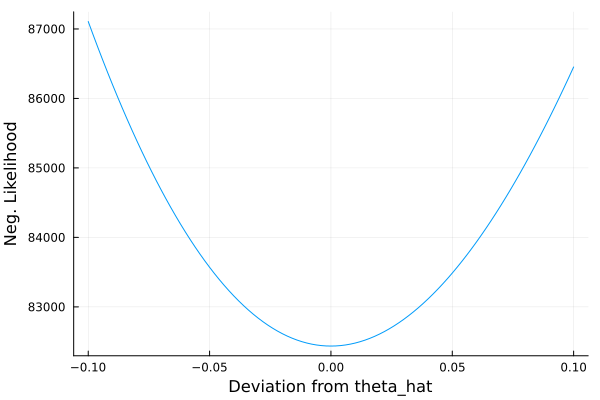

In [125]:
LikeFunAroundOptim = [LikeFun(theta_hat + [zeros(j-1);ones(1)*h;zeros(5-j)]) for h in -.1:.002:.1, j in 1:5];
plot(-.1:.002:.1,LikeFunAroundOptim[:,2],xlabel="Deviation from theta_hat",ylabel="Neg. Likelihood",label="")
